In [1]:
import pandas as pd
import numpy as np
import os

**1. Данные по потенциальным бактериоцинам**

In [3]:
import pandas as pd

#загружаем весь файл с предсказанными бактериоцинами как строки
with open('filtered_hmm_hits.tsv') as f:
    lines = [line for line in f if not line.startswith('#')]

#разбиваем строки: первые 22 поля — фиксированные, остальное — описание
data = []
for line in lines:
    parts = line.strip().split()
    fixed = parts[:22]  #первые 22 колонки фиксированы
    description = ' '.join(parts[22:])  #остальное — описание
    data.append(fixed + [description])

#создаём DataFrame
columns = [
    'target_name', 'target_accession', 'tlen', 'query_name', 'query_accession',
    'qlen', 'full_evalue', 'full_score', 'full_bias', 'domain_num',
    'domain_total', 'c_evalue', 'i_evalue', 'domain_score', 'domain_bias',
    'hmm_from', 'hmm_to', 'ali_from', 'ali_to', 'env_from', 'env_to',
    'acc', 'description'
]

df = pd.DataFrame(data, columns=columns)

df


,target_name,target_accession,tlen,query_name,query_accession,qlen,full_evalue,full_score,full_bias,domain_num,...,domain_score,domain_bias,hmm_from,hmm_to,ali_from,ali_to,env_from,env_to,acc,description
0,Colicin-DNase,PF12639.13,96,WP_000056040.1,-,527,3.8e-35,112.0,0.4,1,...,-1.4,0.1,46,46,132,132,78,173,0.57,DNase/tRNase domain of colicin-like bacteriocin
1,Colicin-DNase,PF12639.13,96,WP_000056040.1,-,527,3.8e-35,112.0,0.4,2,...,112.0,0.4,3,96,423,516,421,516,0.98,DNase/tRNase domain of colicin-like bacteriocin
2,Colicin-DNase,PF12639.13,96,WP_000056089.1,-,564,2.6e-18,58.1,1.0,1,...,-3.0,0.0,10,52,124,166,117,182,0.56,DNase/tRNase domain of colicin-like bacteriocin
3,Colicin-DNase,PF12639.13,96,WP_000056089.1,-,564,2.6e-18,58.1,1.0,2,...,-2.3,0.0,27,55,189,216,148,221,0.69,DNase/tRNase domain of colicin-like bacteriocin
4,Colicin-DNase,PF12639.13,96,WP_000056089.1,-,564,2.6e-18,58.1,1.0,3,...,56.4,0.1,3,96,462,551,460,551,0.86,DNase/tRNase domain of colicin-like bacteriocin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12702,Lactococcin_972,PF09683.15,62,WP_422646782.1,-,152,1.8e-14,45.5,7.7,1,...,44.4,7.7,1,62,84,150,84,150,0.91,Bacteriocin (Lactococcin_972)
12703,Microcin,PF03526.18,55,WP_421930378.1,-,81,6.2e-14,43.0,0.1,1,...,42.2,0.1,14,53,10,47,4,49,0.94,Colicin E1 (microcin) immunity protein
12704,Colicin,PF01024.24,185,WP_421796182.1,-,466,5.5e-24,76.3,3.4,1,...,-2.5,1.2,41,70,67,94,40,107,0.60,Colicin pore forming domain
12705,Colicin,PF01024.24,185,WP_421796182.1,-,466,5.5e-24,76.3,3.4,2,...,-5.2,5.9,32,74,134,175,117,207,0.57,Colicin pore forming domain


In [4]:
df1 = df[['target_name', 'query_name', 'qlen', 'acc', 'description']]
df1 = df1.rename(columns={'acc': 'accuracy', 'qlen': 'query_length'})
df1

,target_name,query_name,query_length,accuracy,description
0,Colicin-DNase,WP_000056040.1,527,0.57,DNase/tRNase domain of colicin-like bacteriocin
1,Colicin-DNase,WP_000056040.1,527,0.98,DNase/tRNase domain of colicin-like bacteriocin
2,Colicin-DNase,WP_000056089.1,564,0.56,DNase/tRNase domain of colicin-like bacteriocin
3,Colicin-DNase,WP_000056089.1,564,0.69,DNase/tRNase domain of colicin-like bacteriocin
4,Colicin-DNase,WP_000056089.1,564,0.86,DNase/tRNase domain of colicin-like bacteriocin
...,...,...,...,...,...
12702,Lactococcin_972,WP_422646782.1,152,0.91,Bacteriocin (Lactococcin_972)
12703,Microcin,WP_421930378.1,81,0.94,Colicin E1 (microcin) immunity protein
12704,Colicin,WP_421796182.1,466,0.60,Colicin pore forming domain
12705,Colicin,WP_421796182.1,466,0.57,Colicin pore forming domain


In [5]:
!pip install biopython

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [6]:
import sys
!{sys.executable} -m pip install biopython


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [7]:
import sys
print(sys.executable)


/opt/tljh/user/bin/python


In [8]:
!{sys.executable} -m pip install biopython


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [9]:
!/opt/tljh/user/bin/python -m pip install --user biopython


You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [11]:
from Bio import SeqIO
import pandas as pd

#парсим fasta-файл с аминокислотными последовательностями предсказанных бактериоцинов
records = list(SeqIO.parse("POTENTIAL_BACTERIOCINS_proteins.fasta", "fasta"))

#переводим в DataFrame
df2 = pd.DataFrame(
    [(record.id, str(record.seq)) for record in records],
    columns=["ID", "Sequence"]
)

df2


,ID,Sequence
0,WP_000387558.1,MEAKKWYRYLIQLIVVALIVTSVPLNGLAETAPPFTPSPNSEQSPE...
1,WP_000107154.1,MSTQIKVTPEQLEQAAKTVKNTRSSLEYIHQDLYSQTEYIASQWSG...
2,WP_012970868.1,MNWVDYIIIGIIALSALVGLARGLIREVLSLGTWIAALVIAWLFHQ...
3,WP_012697582.1,MTTFDWILLALIGASTLLSLWRGMAHEVLSLASWFVAFWVAKSYAA...
4,WP_011213644.1,MQLQWVDIAIVAIIALSVLTGLFRGFVKELVALCVWILAIWLGFNY...
...,...,...
8789,WP_410170928.1,MSSYVFHHKNPIYNGGGVYDLDNIMISSPRMHQEILYKGFHFNK
8790,WP_410018342.1,MPFTWVDWAIVAIVAISALISLSRGFVKEALSLLTWVVAGVVAWMF...
8791,WP_410055334.1,MAWKGSVFPSLASVNPLVVAGLSTILFPFSVKLVEDFALKYTEREF...
8792,WP_409938056.1,MPANGNIVVTAAGRGLIQVAQGAASLAQAISDAIAALGRVLASAPS...


In [12]:
#делаем переименование колонок и добавляем новую колонку Existence
df_total_predicted_bacteriocins = pd.merge(df1, df2, how='left', left_on='query_name', right_on='ID')
df_total_predicted_bacteriocins = df_total_predicted_bacteriocins.drop('query_name', axis=1)
df_total_predicted_bacteriocins['existence'] = 'predicted'
df_total_predicted_bacteriocins = df_total_predicted_bacteriocins.drop('description', axis=1)
df_total_predicted_bacteriocins = df_total_predicted_bacteriocins.rename(columns={'target_name': 'Protein_Name'})
df_total_predicted_bacteriocins['Existence'] = df_total_predicted_bacteriocins['existence'].str.cat(df_total_predicted_bacteriocins['accuracy'], sep=', accuracy ')
df_total_predicted_bacteriocins = df_total_predicted_bacteriocins.drop(columns=['accuracy', 'existence', 'query_length'])
df_total_predicted_bacteriocins = df_total_predicted_bacteriocins.dropna()
df_total_predicted_bacteriocins

,Protein_Name,ID,Sequence,Existence
0,Colicin-DNase,WP_000056040.1,MSLNMYLGEVQAQTQSMNAFCTATIQGMEQAIQSIDAFTSDTVLQG...,"predicted, accuracy 0.57"
1,Colicin-DNase,WP_000056040.1,MSLNMYLGEVQAQTQSMNAFCTATIQGMEQAIQSIDAFTSDTVLQG...,"predicted, accuracy 0.98"
2,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.56"
3,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.69"
4,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.86"
...,...,...,...,...
12702,Lactococcin_972,WP_422646782.1,MTMRRFPRVMAAATGIAAAVAGTVLTTGAAAAESPTLIAEEPGIQI...,"predicted, accuracy 0.91"
12703,Microcin,WP_421930378.1,MWRVLSGISMISFLLYPVSKMAIERFALIYTKREFWSRGIFMETPA...,"predicted, accuracy 0.94"
12704,Colicin,WP_421796182.1,METAVAYYKDGVPYDDKGQVIITLLNGTPDGSGSGGGGGKGGSKSE...,"predicted, accuracy 0.60"
12705,Colicin,WP_421796182.1,METAVAYYKDGVPYDDKGQVIITLLNGTPDGSGSGGGGGKGGSKSE...,"predicted, accuracy 0.57"


In [13]:
#проверка NaN-значений
df_total_predicted_bacteriocins.isna().any()

Protein_Name    False
ID              False
Sequence        False
Existence       False
dtype: bool

In [14]:
#какие уникальные названия предсказанных бактериоцинов есть а датафрейме
df_total_predicted_bacteriocins.Protein_Name.unique()

array(['Colicin-DNase', 'Col-Pyo_DNase', 'Colicin_Pyocin', 'EntA_Immun',
       'Microcin', 'Colicin_V', 'Colicin_im', 'Bacteriocin_IIi',
       'LcnG-beta', 'Colicin', 'Gallidermin', 'Colicin_M', 'Pyocin_S',
       'Lactococcin_972', 'Mersacidin', 'Colicin_immun', 'MccV',
       'Colicin_Ia', 'Cloacin', 'Colicin_D', 'CKI', 'ColA_N',
       'PyocinActivator', 'ImmE5', 'Lactococcin', 'E2R135', 'PBECR5',
       'Colicin_E5', 'PBECR1', 'Csa_translocation_dom', 'PBECR3',
       'PBECR2', 'DurB-like', 'BacteriocIIc_cy', 'PBECR4', 'Sublancin'],
      dtype=object)

In [15]:
#сколько таких названий
len(df_total_predicted_bacteriocins.Protein_Name.unique())

36

In [16]:
#в отдельный текстовый файл отобрала из этого списка бактериоцины без вспомогательных белков
#открываю этот текстовый файл
with open('predicted_bacteriocins.txt', 'r', encoding='utf-8') as f:
    predicted_bacteriocins_list = f.read().splitlines()
predicted_bacteriocins_list

['Colicin-DNase',
 'Colicin_Pyocin',
 'Microcin',
 'Colicin_V',
 'Colicin_im',
 'Bacteriocin_IIi',
 'Colicin',
 'Gallidermin',
 'Colicin_M',
 'Pyocin_S',
 'Lactococcin_972',
 'Mersacidin',
 'Colicin_immun',
 'Colicin_Ia',
 'Cloacin',
 'Colicin_D',
 'CKI',
 'PyocinActivator',
 'Lactococcin',
 'Colicin_E5',
 'Sublancin']

In [17]:
len(predicted_bacteriocins_list)

21

In [18]:
#фильтрую датафрейм, оставляя только реально существующие бактериоицны
df_predicted_bacteriocins = df_total_predicted_bacteriocins[df_total_predicted_bacteriocins['Protein_Name'].isin(predicted_bacteriocins_list)]
df_predicted_bacteriocins

,Protein_Name,ID,Sequence,Existence
0,Colicin-DNase,WP_000056040.1,MSLNMYLGEVQAQTQSMNAFCTATIQGMEQAIQSIDAFTSDTVLQG...,"predicted, accuracy 0.57"
1,Colicin-DNase,WP_000056040.1,MSLNMYLGEVQAQTQSMNAFCTATIQGMEQAIQSIDAFTSDTVLQG...,"predicted, accuracy 0.98"
2,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.56"
3,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.69"
4,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.86"
...,...,...,...,...
12702,Lactococcin_972,WP_422646782.1,MTMRRFPRVMAAATGIAAAVAGTVLTTGAAAAESPTLIAEEPGIQI...,"predicted, accuracy 0.91"
12703,Microcin,WP_421930378.1,MWRVLSGISMISFLLYPVSKMAIERFALIYTKREFWSRGIFMETPA...,"predicted, accuracy 0.94"
12704,Colicin,WP_421796182.1,METAVAYYKDGVPYDDKGQVIITLLNGTPDGSGSGGGGGKGGSKSE...,"predicted, accuracy 0.60"
12705,Colicin,WP_421796182.1,METAVAYYKDGVPYDDKGQVIITLLNGTPDGSGSGGGGGKGGSKSE...,"predicted, accuracy 0.57"


In [19]:
#нужно поискать дубликаты строк по ID и Sequence
df_predicted_bacteriocins[df_predicted_bacteriocins.duplicated(subset=['ID', 'Sequence'])]

,Protein_Name,ID,Sequence,Existence
1,Colicin-DNase,WP_000056040.1,MSLNMYLGEVQAQTQSMNAFCTATIQGMEQAIQSIDAFTSDTVLQG...,"predicted, accuracy 0.98"
3,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.69"
4,Colicin-DNase,WP_000056089.1,MSLNMYLGEVQSQTNTMYAFCTATIQSMEQVIQSIDSFVSDSVLQG...,"predicted, accuracy 0.86"
6,Colicin-DNase,WP_000056063.1,MSLNMYLGEVQNQTQSMNAVCTATIQGMEQAIQSIDAFAIDTVLQG...,"predicted, accuracy 0.98"
20,Colicin-DNase,WP_000107151.1,MSTQIKVTPEQLEQAAKTVKNTRSSLEYIHKDLYSQTEYIASQWSG...,"predicted, accuracy 0.98"
...,...,...,...,...
12691,Colicin_Pyocin,WP_420907627.1,MSDEGKWLESASSGLGAPVPAQVADKLIGKKFERFDDFREAFWLAV...,"predicted, accuracy 0.97"
12693,Microcin,WP_420902488.1,MIIEKTALRFTTREFWTTGLFTESPGKNGLYAIFYVACTILAVPIF...,"predicted, accuracy 0.61"
12695,Microcin,WP_420893556.1,MIIEKTALRFTTREFWTTGLFTESPGKNGLYAIFYVCCTILAVPIF...,"predicted, accuracy 0.64"
12705,Colicin,WP_421796182.1,METAVAYYKDGVPYDDKGQVIITLLNGTPDGSGSGGGGGKGGSKSE...,"predicted, accuracy 0.57"


In [20]:
#удаляем дубликаты, оставляя строку с наибольшим accuracy


#извлекаем accuracy в новый столбец как float
df_predicted_bacteriocins['Accuracy'] = df_predicted_bacteriocins['Existence'].str.extract(r'accuracy ([0-9.]+)').astype(float)

#сортируем по Accuracy по убыванию, чтобы на первом месте была максимальная точность
df_predicted_bacteriocins = df_predicted_bacteriocins.sort_values(by='Accuracy', ascending=False)

#удаляем дубликаты, оставляя первую (с максимальной точностью)
df_predicted_bacteriocins = df_predicted_bacteriocins.drop_duplicates(subset=['ID', 'Sequence'], keep='first')
df_predicted_bacteriocins = df_predicted_bacteriocins.drop('Accuracy', axis=1)
df_predicted_bacteriocins

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Protein_Name,ID,Sequence,Existence
1326,Colicin_M,WP_032494159.1,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00"
6870,Colicin,WP_223683573.1,MDEIASLQTRLDKLNAETTRRRTEAERKAAEEQALQDAVKFTADFY...,"predicted, accuracy 1.00"
6868,Colicin,WP_223686075.1,MDEIASLQARLVKLNAETTRRRTEAERKAAEEQALQDAIKFTADFY...,"predicted, accuracy 1.00"
6863,Colicin,WP_223684047.1,MDEIASLQARLVKLNAETTRRRTEAERKAAEEQALQDAIKFTAEFY...,"predicted, accuracy 1.00"
3295,Colicin_M,WP_089636711.1,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00"
...,...,...,...,...
12524,Colicin_immun,WP_416375978.1,MYKFKSEERLLDENLFLLLDGLFGDVDAYTEDESLLIESPGLYLSR...,"predicted, accuracy 0.64"
4379,Colicin-DNase,WP_128214882.1,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,"predicted, accuracy 0.62"
7438,Colicin-DNase,WP_232103089.1,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,"predicted, accuracy 0.61"
215,Colicin-DNase,WP_002648365.1,MYNFTRKLLILSCFLFTGFCFWKAGTGLIGGADATVLPSAQAAVHP...,"predicted, accuracy 0.60"


In [21]:
#получаем список ID - по ним будем искать Organism и TaxID
list1 = df_predicted_bacteriocins.ID.to_list()

#записываем каждый ID на новой строке в файл
with open('bacteriocins_ids.txt', 'w') as f:
    for item in list1:
        f.write(f"{item}\n")


In [22]:
#добавляю колонку Organism
new_column_df = pd.read_csv('bacteriocins_part_aa_polina_results.tsv', sep='\t')
new_column_df0 = pd.read_csv('bacteriocins_part_ab_polina_results.tsv', sep='\t')
new_column_df1 = pd.read_csv('bacteriocins_part_ac_polina_results.tsv', sep='\t')
new_column_df2 = pd.read_csv('bacteriocins_part_ad_polina_results.tsv', sep='\t')
new_column_df3 = pd.read_csv('bacteriocins_part_ae_polina_results.tsv', sep='\t')
new_column_df4 = pd.read_csv('bacteriocins_part_af_polina_results.tsv', sep='\t')
new_column_df5 = pd.read_csv('bacteriocins_part_ag_polina_results.tsv', sep='\t')
new_column_df6 = pd.read_csv('bacteriocins_part_ah_polina_results.tsv', sep='\t')
new_column_df7 = pd.read_csv('bacteriocins_part_ai_polina_results.tsv', sep='\t')
new_column_df8 = pd.read_csv('bacteriocins_part_aj_polina_results.tsv', sep='\t')
new_column_df_Organism = pd.concat([new_column_df, new_column_df0, new_column_df1, new_column_df2, new_column_df3, new_column_df4, new_column_df5, new_column_df6, new_column_df7, new_column_df8])
new_column_df_Organism = new_column_df_Organism.drop_duplicates(subset=['Protein', 'Organism'])
new_column_df_Organism = new_column_df_Organism.sort_values('Organism')
new_column_df_Organism = new_column_df_Organism.drop_duplicates(subset=['Protein'], keep='first')
new_column_df_Organism = new_column_df_Organism[['Protein', 'Organism', 'Source']]
new_column_df_Organism = new_column_df_Organism.rename(columns={'Protein': 'ID'})


df_predicted_bacteriocins_with_organism = pd.merge(df_predicted_bacteriocins, new_column_df_Organism, on='ID')
df_predicted_bacteriocins_with_organism



/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Protein_Name,ID,Sequence,Existence,Organism,Source
0,Colicin_M,WP_032494159.1,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00",Escherichia coli,RefSeq
1,Colicin,WP_223683573.1,MDEIASLQTRLDKLNAETTRRRTEAERKAAEEQALQDAVKFTADFY...,"predicted, accuracy 1.00",Pseudomonas aeruginosa,RefSeq
2,Colicin,WP_223686075.1,MDEIASLQARLVKLNAETTRRRTEAERKAAEEQALQDAIKFTADFY...,"predicted, accuracy 1.00",Pseudomonas aeruginosa,RefSeq
3,Colicin,WP_223684047.1,MDEIASLQARLVKLNAETTRRRTEAERKAAEEQALQDAIKFTAEFY...,"predicted, accuracy 1.00",Pseudomonas aeruginosa,RefSeq
4,Colicin_M,WP_089636711.1,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00",Escherichia coli,RefSeq
...,...,...,...,...,...,...
8155,Colicin_immun,WP_416375978.1,MYKFKSEERLLDENLFLLLDGLFGDVDAYTEDESLLIESPGLYLSR...,"predicted, accuracy 0.64",Pseudomonas protegens,RefSeq
8156,Colicin-DNase,WP_128214882.1,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,"predicted, accuracy 0.62",Clostridium manihotivorum,RefSeq
8157,Colicin-DNase,WP_232103089.1,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,"predicted, accuracy 0.61",Gimesia maris,RefSeq
8158,Colicin-DNase,WP_002648365.1,MYNFTRKLLILSCFLFTGFCFWKAGTGLIGGADATVLPSAQAAVHP...,"predicted, accuracy 0.60",Gimesia maris,RefSeq


In [23]:
#какие уникальные названия бактерий-продуцентов есть а датафрейме
list_of_organisms = list(df_predicted_bacteriocins_with_organism.Organism.unique())
list_of_organisms

['Escherichia coli',
 'Pseudomonas aeruginosa',
 'Salmonella enterica subsp. enterica serovar Derby',
 'Escherichia albertii',
 'Salmonella enterica subsp. enterica serovar Heidelberg',
 'Escherichia coli O78:H4',
 'Klebsiella variicola subsp. variicola',
 'Salmonella enterica subsp. enterica serovar Typhimurium str. USDA-ARS-USMARC-1898',
 'Yersinia bercovieri',
 'Enterobacter cloacae complex sp. CDL004',
 'Pseudomonas asiatica',
 'Entomospira culicis',
 'Klebsiella aerogenes',
 'Streptomyces nojiriensis',
 'Photorhabdus akhurstii',
 'Nocardiopsis exhalans',
 'Serratia sp. FS14',
 'Yersinia sp. KBS0713',
 'Pseudomonas fragi',
 'Enterobacter hormaechei',
 'Yersinia pseudotuberculosis',
 'Enterobacter asburiae',
 'Enterobacter cloacae complex sp. SHL022',
 'Pseudomonas ficuserectae',
 'Proteus sp. G2669',
 'Citrobacter freundii',
 'Streptomyces sp. NBC_01006',
 'Thauera sp. GDN1',
 'Pseudomonas viciae',
 'Vibrio cholerae',
 'Pseudomonas sp. UW4',
 'Enterobacter chuandaensis',
 'Franconi

In [24]:
#записываем каждый organism на новой строке в файл
with open('organism_names_original.txt', 'w') as f:
    for item in list_of_organisms:
        f.write(f"{item}\n")

In [25]:
#создаю датафрейм с TaxID
TaxID_df = pd.read_csv('all_taxids_combined.tsv', sep='\t', names=['Organism', 'TaxID'])
TaxID_df = TaxID_df.dropna()
TaxID_df['TaxID'] = TaxID_df['TaxID'].astype(int)
TaxID_df

,Organism,TaxID
0,Escherichia coli,562
1,Pseudomonas aeruginosa,287
2,Salmonella enterica subsp. enterica serovar Derby,28144
3,Escherichia albertii,208962
4,Salmonella enterica subsp. enterica serovar He...,611
...,...,...
2933,Providencia sp. PROV102,2936787
2934,Cronobacter malonaticus,413503
2935,Cronobacter malonaticus LMG 23826,1159491
2936,Clostridium manihotivorum,2320868


In [26]:
#соединяю датафреймы через inner merge
df_predicted_bacteriocins_with_organism_taxID = pd.merge(TaxID_df, df_predicted_bacteriocins_with_organism, on='Organism')
df_predicted_bacteriocins_with_organism_taxID = df_predicted_bacteriocins_with_organism_taxID[['ID', 'Protein_Name', 'Organism', 'TaxID', 'Sequence', 'Existence']]
df_predicted_bacteriocins_with_organism_taxID

,ID,Protein_Name,Organism,TaxID,Sequence,Existence
0,WP_032494159.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00"
1,WP_089636711.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00"
2,WP_416842735.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,"predicted, accuracy 1.00"
3,WP_094308160.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,"predicted, accuracy 1.00"
4,WP_001520060.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGADPLLVQVVYSFFQ...,"predicted, accuracy 1.00"
...,...,...,...,...,...,...
8100,WP_023897753.1,Colicin-DNase,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,"predicted, accuracy 0.68"
8101,WP_081050448.1,Colicin-DNase,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,"predicted, accuracy 0.68"
8102,WP_128214882.1,Colicin-DNase,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,"predicted, accuracy 0.62"
8103,WP_232103089.1,Colicin-DNase,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,"predicted, accuracy 0.61"


In [27]:
#создаю функцию для детекции того, из какой базы данных был взят бакетриоцин
def detect_source(protein_id):
    if protein_id.startswith(("WP_", "NP_", "XP_", "YP_")):
        return "RefSeq"
    elif protein_id.startswith(("A0A", "D3V", "I6W", "O", "P", "Q", "Z9J")) and len(protein_id) == 6:
        return "UniProtKB/TrEMBL"
    elif protein_id.startswith(("P", "Q")) and "_" not in protein_id:  # Swiss-Prot
        return "UniProtKB/Swiss-Prot"
    else:
        return "Unknown"

#применяем к столбцу ID
df_predicted_bacteriocins_with_organism_taxID["Protein_Source"] = df_predicted_bacteriocins_with_organism_taxID["ID"].apply(detect_source)
df_predicted_bacteriocins_with_organism_taxID

,ID,Protein_Name,Organism,TaxID,Sequence,Existence,Protein_Source
0,WP_032494159.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00",RefSeq
1,WP_089636711.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,"predicted, accuracy 1.00",RefSeq
2,WP_416842735.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,"predicted, accuracy 1.00",RefSeq
3,WP_094308160.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,"predicted, accuracy 1.00",RefSeq
4,WP_001520060.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGADPLLVQVVYSFFQ...,"predicted, accuracy 1.00",RefSeq
...,...,...,...,...,...,...,...
8100,WP_023897753.1,Colicin-DNase,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,"predicted, accuracy 0.68",RefSeq
8101,WP_081050448.1,Colicin-DNase,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,"predicted, accuracy 0.68",RefSeq
8102,WP_128214882.1,Colicin-DNase,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,"predicted, accuracy 0.62",RefSeq
8103,WP_232103089.1,Colicin-DNase,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,"predicted, accuracy 0.61",RefSeq


In [28]:
#разносим данные из Existence на 2 колонки

#разделяем колонку на две части
df_split = df_predicted_bacteriocins_with_organism_taxID['Existence'].str.split('accuracy', expand=True, n=1)

#присваиваем новые колонки
df_predicted_bacteriocins_with_organism_taxID['Existence'] = df_split[0]
df_predicted_bacteriocins_with_organism_taxID['Accuracy'] = df_split[1].str.strip()



In [29]:
#удаляем старую колонку Existence
df_predicted_bacteriocins_with_organism_taxID = df_predicted_bacteriocins_with_organism_taxID.drop('Existence', axis=1)
df_predicted_bacteriocins_with_organism_taxID

,ID,Protein_Name,Organism,TaxID,Sequence,Protein_Source,Accuracy
0,WP_032494159.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,RefSeq,1.00
1,WP_089636711.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,RefSeq,1.00
2,WP_416842735.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,RefSeq,1.00
3,WP_094308160.1,Colicin_Ia,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,RefSeq,1.00
4,WP_001520060.1,Colicin_M,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGADPLLVQVVYSFFQ...,RefSeq,1.00
...,...,...,...,...,...,...,...
8100,WP_023897753.1,Colicin-DNase,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,RefSeq,0.68
8101,WP_081050448.1,Colicin-DNase,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,RefSeq,0.68
8102,WP_128214882.1,Colicin-DNase,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,RefSeq,0.62
8103,WP_232103089.1,Colicin-DNase,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,RefSeq,0.61


In [30]:
#пристаиваю значение predicted всем строкам и меняю порядок колонок
df_predicted_bacteriocins_with_organism_taxID['Existence'] = 'predicted'
df_predicted_bacteriocins_with_organism_taxID = df_predicted_bacteriocins_with_organism_taxID[['Protein_Name', 'ID', 'Protein_Source', 'Organism', 'TaxID', 'Sequence', 'Existence', 'Accuracy']]
df_predicted_bacteriocins_with_organism_taxID

,Protein_Name,ID,Protein_Source,Organism,TaxID,Sequence,Existence,Accuracy
0,Colicin_M,WP_032494159.1,RefSeq,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,predicted,1.00
1,Colicin_M,WP_089636711.1,RefSeq,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGAGPLLVQVVYSFFQ...,predicted,1.00
2,Colicin_Ia,WP_416842735.1,RefSeq,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,predicted,1.00
3,Colicin_Ia,WP_094308160.1,RefSeq,Escherichia coli,562,MSDPVRITNPGAESLGYDSDGHEIMAVDIYVNPPRVDVFHGTPPAW...,predicted,1.00
4,Colicin_M,WP_001520060.1,RefSeq,Escherichia coli,562,METLTVHAPSPSTNLPSYGNGAFSLSAPHVPGADPLLVQVVYSFFQ...,predicted,1.00
...,...,...,...,...,...,...,...,...
8100,Colicin-DNase,WP_023897753.1,RefSeq,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
8101,Colicin-DNase,WP_081050448.1,RefSeq,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
8102,Colicin-DNase,WP_128214882.1,RefSeq,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,predicted,0.62
8103,Colicin-DNase,WP_232103089.1,RefSeq,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,predicted,0.61


In [31]:
len(df_predicted_bacteriocins_with_organism_taxID)

8105

**2. Описательные статистики по созданному датафрейму с предсказанными бактериоцинами**

In [90]:
#сделаем описательные статистики

import seaborn as sns
import matplotlib.pyplot as plt

copy_df = df_predicted_bacteriocins_with_organism_taxID.groupby('Protein_Name', as_index=False) \
    .agg({'Protein_Source': 'count'}) \
    .rename(columns={'Protein_Source': 'Count'}) \
    .sort_values('Count', ascending=False)

#дочищаю лишние вспомогательные белки вручную
copy_df = copy_df.reset_index(drop=True)
copy_df = copy_df.drop(19)
copy_df = copy_df.drop([6, 10, 11])
copy_df

list_of_names = ['Pyocin_S', 'Colicin_V', 'Colicin_Pyocin', 'Colicin-DNase', 'Colicin', 'Colicin_M', 'Colicin_Ia', 'Colicin_E5', 'Colicin_D']

copy_df_new = copy_df[copy_df['Protein_Name'].isin(list_of_names)].reset_index(drop=True)
copy_df_new

,Protein_Name,Count
0,Pyocin_S,2216
1,Colicin_V,2137
2,Colicin_Pyocin,1073
3,Colicin-DNase,646
4,Colicin,414
5,Colicin_M,148
6,Colicin_Ia,68
7,Colicin_E5,47
8,Colicin_D,39


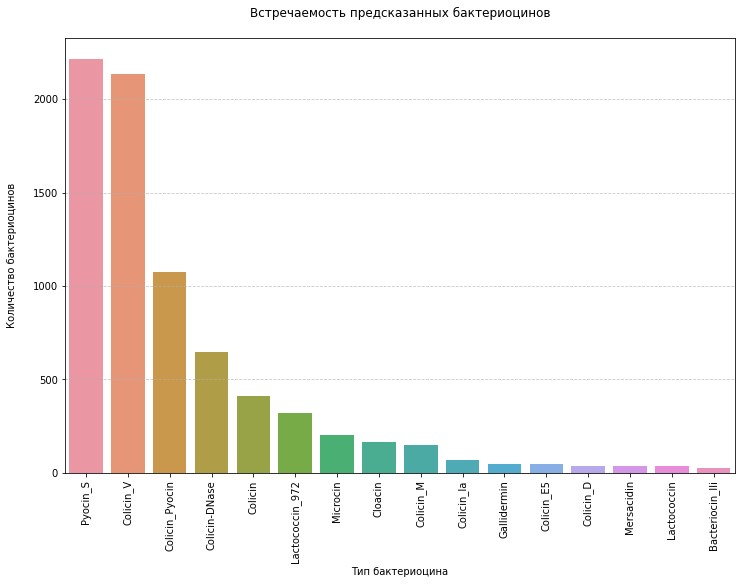

In [92]:
#строим график
plt.figure(figsize=(12,8))
sns.barplot(x='Protein_Name', y='Count', data=copy_df);
plt.xticks(rotation=90)
plt.title('Встречаемость предсказанных бактериоцинов\n');
plt.grid(axis='y', linestyle='--', alpha=0.7);
plt.xlabel('Тип бактериоцина');
plt.ylabel('Количество бактериоцинов\n');

In [34]:
#сохраняю датафрйем с предсказанными бактериоцинами
df_predicted_bacteriocins_with_organism_taxID.to_csv('predicted_bacteriocins_df', index=False)

**3. Данные по аннотированным бактериоцинам**

In [36]:
#загружаю данные
import re

records = []
for record in SeqIO.parse("uniprotkb_bacteriocin_2025_04_03.fasta", "fasta"):
    #разбиваем описание с помощью регулярки
    desc = record.description
    match = re.search(r"^(\w+)\|(\w+)\|(\S+)\s(.+?)\sOS=(.+?)\sOX=(\d+)\sGN=(\S+)\sPE=(\d+)\sSV=(\d+)", desc)
    if match:
        db_source = match.group(1)
        uniprot_id = match.group(2)
        entry_name = match.group(3)
        protein_name = match.group(4)
        organism = match.group(5)
        taxid = match.group(6)
        gene = match.group(7)
        pe = match.group(8)
        sv = match.group(9)
        sequence = str(record.seq)

        records.append((uniprot_id, entry_name, protein_name, organism, taxid, gene, pe, sv, sequence))

df3 = pd.DataFrame(records, columns=[
    "UniProt_ID", "Entry_Name", "Protein_Name", "Organism",
    "TaxID", "Gene", "Protein_Existence", "Sequence_Version", "Sequence"
])

df3 = df3[['UniProt_ID', 'Protein_Name', 'Organism', 'TaxID', 'Sequence']]
df3['Existence'] = 'exists'
df3 = df3.rename(columns={'UniProt_ID': 'ID'})
df3

,ID,Protein_Name,Organism,TaxID,Sequence,Existence
0,D3VML5,Plantazolicin,Bacillus velezensis (strain DSM 23117 / BGSC 1...,326423,MTQIKVPTALIASVHGEGQHLFEPMAARCTCTTIISSSSTF,exists
1,I6WZG6,Type 1 encapsulin shell protein,Mycobacterium tuberculosis (strain ATCC 25618 ...,83332,MNNLYRDLAPVTEAAWAEIELEAARTFKRHIAGRRVVDVSDPGGPV...,exists
2,O07623,Subtilosin-A,Bacillus subtilis (strain 168),224308,MKKAVIVENKGCATCSIGAACLVDGPIPDFEIAGATGLFGLWG,exists
3,O31422,Sporulation killing factor,Bacillus subtilis (strain 168),224308,MKRNQKEWESVSKKGLMKPGGTSIVKAAGCMGCWASKSIAMTRVCA...,exists
4,O34344,Sporulation delaying protein C,Bacillus subtilis (strain 168),224308,MKSKLLRLLIVSMVTILVFSLVGLSKESSTSAKENHTFSGEDYFRG...,exists
...,...,...,...,...,...,...
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists
126419,Z9JGX5,Membrane protein TolA,Xylella taiwanensis,1444770,MHTDVQLGRSRRREGVVFPVLMALLLHAFVAGVFLLAWLWSPKHET...,exists
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists
126421,Z9JL64,Bacteriocin,Xylella taiwanensis,1444770,MREMSELEIERISGAGIWDDLSTGVNIVFHWVTVNIDDIKAFFNGF...,exists


In [37]:
#посмотрим на уникальные названия бактериоцинов
df3.Protein_Name.unique()

array(['Plantazolicin', 'Type 1 encapsulin shell protein', 'Subtilosin-A',
       ..., 'Infantaricin E', 'Infantaricin G2',
       'Bacteriocin biosynthesis cyclodehydratase family protein'],
      dtype=object)

In [38]:
#сохраним их в текстовый файл для дальнейшей фильтрации на реальные бактериоцины и вспомогательные белки при помощи нейронки
unique_protein_names = df3.Protein_Name.unique()
np.savetxt('all_protein_names.txt', unique_protein_names, fmt='%s')

In [40]:
df3_copy = df3.copy()
df3_copy

,ID,Protein_Name,Organism,TaxID,Sequence,Existence
0,D3VML5,Plantazolicin,Bacillus velezensis (strain DSM 23117 / BGSC 1...,326423,MTQIKVPTALIASVHGEGQHLFEPMAARCTCTTIISSSSTF,exists
1,I6WZG6,Type 1 encapsulin shell protein,Mycobacterium tuberculosis (strain ATCC 25618 ...,83332,MNNLYRDLAPVTEAAWAEIELEAARTFKRHIAGRRVVDVSDPGGPV...,exists
2,O07623,Subtilosin-A,Bacillus subtilis (strain 168),224308,MKKAVIVENKGCATCSIGAACLVDGPIPDFEIAGATGLFGLWG,exists
3,O31422,Sporulation killing factor,Bacillus subtilis (strain 168),224308,MKRNQKEWESVSKKGLMKPGGTSIVKAAGCMGCWASKSIAMTRVCA...,exists
4,O34344,Sporulation delaying protein C,Bacillus subtilis (strain 168),224308,MKSKLLRLLIVSMVTILVFSLVGLSKESSTSAKENHTFSGEDYFRG...,exists
...,...,...,...,...,...,...
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists
126419,Z9JGX5,Membrane protein TolA,Xylella taiwanensis,1444770,MHTDVQLGRSRRREGVVFPVLMALLLHAFVAGVFLLAWLWSPKHET...,exists
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists
126421,Z9JL64,Bacteriocin,Xylella taiwanensis,1444770,MREMSELEIERISGAGIWDDLSTGVNIVFHWVTVNIDDIKAFFNGF...,exists


In [41]:
#проведем первый этап дополнительной фильтрации бактериоцинов по регулярному выражению

#список "настоящих" бактериоцинов
bacteriocins = [
    "acidocin", "actagardine", "agrocin", "alveicin", "aureocin", "aureocin A53", "aureocin A70", "bisin",
    "carnocin", "carnocyclin", "caseicin", "cerein", "circularin A", "colicin", "curvaticin", "divercin",
    "duramycin", "enterocin", "enterolysin", "epidermin", "gallidermin", "erwiniocin", "gardimycin",
    "gassericin A", "glycinecin", "halocin", "haloduracin", "klebicin", "lactocin S", "lactococcin",
    "lacticin", "leucoccin", "lysostaphin", "macedocin", "mersacidin", "mesentericin", "microbisporicin",
    "microcin", "microcin S", "mutacin", "nisin", "paenibacillin", "planosporicin", "pediocin", "pentocin",
    "plantaricin", "pneumocyclicin", "pyocin", "reutericin 6", "reutericyclin", "reuterin", "sakacin",
    "salivaricin", "sublancin", "subtilin", "sulfolobicin", "tasmancin", "thuricin 17", "trifolitoxin",
    "variacin", "vibriocin", "warnericin", "warnerin", 'bacteriocin'
]

#регулярное выражение для поиска бактериоцинов
pattern = re.compile(r"\b(" + "|".join([re.escape(b.lower()) for b in bacteriocins]) + r")\b", re.IGNORECASE)


In [42]:
#фильтрация строк по регулярному выражению
df_bacteriocins_only = df3_copy[df3_copy["Protein_Name"].str.contains(pattern, na=False)]
df_bacteriocins_only

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,ID,Protein_Name,Organism,TaxID,Sequence,Existence
5,O54329,Lantibiotic mutacin-2,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists
6,O87236,Lantibiotic lacticin 3147 A1,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists
7,O87237,Lantibiotic lacticin 3147 A2,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists
8,P00646,Colicin E3,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists
20,P36499,Lantibiotic lacticin-481,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists
...,...,...,...,...,...,...
126417,Z9JFM3,Bacteriocin,Xylella taiwanensis,1444770,MRELEIHEIESVDGADMEFVENVAVGVTAGATVGYILFGPLGAAVG...,exists
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists
126421,Z9JL64,Bacteriocin,Xylella taiwanensis,1444770,MREMSELEIERISGAGIWDDLSTGVNIVFHWVTVNIDDIKAFFNGF...,exists


In [43]:
#проведем второй этап дополнительной фильтрации бактериоцинов по регулярному выражению
#обратный паттерн: ищем строки, содержащие хотя бы одно из "вспомогательных" слов
fake_keywords = [
        "immunity", "transporter", "secretion", "processing", 
        "ATP-binding", "permease", "biosynthesis", "leader", 'protection', 'transport'
    ]
fake_pattern = re.compile(r"(" + "|".join([re.escape(word.lower()) for word in fake_keywords]) + r")", re.IGNORECASE)
#оставим только строки, НЕ содержащие слова из списка fake_keywords
df_without_fake = df_bacteriocins_only[~df_bacteriocins_only["Protein_Name"].str.contains(fake_pattern, na=False)]
df_without_fake

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,ID,Protein_Name,Organism,TaxID,Sequence,Existence
5,O54329,Lantibiotic mutacin-2,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists
6,O87236,Lantibiotic lacticin 3147 A1,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists
7,O87237,Lantibiotic lacticin 3147 A2,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists
8,P00646,Colicin E3,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists
20,P36499,Lantibiotic lacticin-481,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists
...,...,...,...,...,...,...
126416,Z4WSW0,Bacteriocin-type signal sequence,Porphyromonas catoniae ATCC 51270,887901,MDIKEFSEEALQAITGGAAGTEPSSGCFGLSNCCNDGCVHKKDESS...,exists
126417,Z9JFM3,Bacteriocin,Xylella taiwanensis,1444770,MRELEIHEIESVDGADMEFVENVAVGVTAGATVGYILFGPLGAAVG...,exists
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists


In [44]:
#смотрим, есть ли NaN-значения
df_without_fake.isna().any()

ID              False
Protein_Name    False
Organism        False
TaxID           False
Sequence        False
Existence       False
dtype: bool

In [45]:
#нужно поискать дубликаты строк по ID и Sequence
df_without_fake[df_without_fake.duplicated(['ID', 'Sequence'])]

,ID,Protein_Name,Organism,TaxID,Sequence,Existence


In [46]:
#задаю всем строкам Accuracy = 1, то есть 100% существование
df_without_fake['Accuracy'] = 1.0
df_without_fake

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Protein_Name,Organism,TaxID,Sequence,Existence,Accuracy
5,O54329,Lantibiotic mutacin-2,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1.0
6,O87236,Lantibiotic lacticin 3147 A1,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1.0
7,O87237,Lantibiotic lacticin 3147 A2,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1.0
8,P00646,Colicin E3,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1.0
20,P36499,Lantibiotic lacticin-481,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1.0
...,...,...,...,...,...,...,...
126416,Z4WSW0,Bacteriocin-type signal sequence,Porphyromonas catoniae ATCC 51270,887901,MDIKEFSEEALQAITGGAAGTEPSSGCFGLSNCCNDGCVHKKDESS...,exists,1.0
126417,Z9JFM3,Bacteriocin,Xylella taiwanensis,1444770,MRELEIHEIESVDGADMEFVENVAVGVTAGATVGYILFGPLGAAVG...,exists,1.0
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists,1.0
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists,1.0


In [47]:
#создаю функцию для детекции того, из какой базы данных был взят бакетриоцин
def detect_source(protein_id):
    if protein_id.startswith(("WP_", "NP_", "XP_", "YP_")):
        return "RefSeq"
    elif protein_id.startswith(("A0A", "D3V", "I6W", "O", "P", "Q", "Z9J")) and len(protein_id) == 6:
        return "UniProtKB/TrEMBL"
    elif protein_id.startswith(("P", "Q")) and "_" not in protein_id:  # Swiss-Prot
        return "UniProtKB/Swiss-Prot"
    else:
        return "Unknown"

# Применяем к столбцу ID
df_without_fake["Protein_Source"] = df_without_fake["ID"].apply(detect_source)
df_without_fake

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ID,Protein_Name,Organism,TaxID,Sequence,Existence,Accuracy,Protein_Source
5,O54329,Lantibiotic mutacin-2,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1.0,UniProtKB/TrEMBL
6,O87236,Lantibiotic lacticin 3147 A1,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1.0,UniProtKB/TrEMBL
7,O87237,Lantibiotic lacticin 3147 A2,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1.0,UniProtKB/TrEMBL
8,P00646,Colicin E3,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1.0,UniProtKB/TrEMBL
20,P36499,Lantibiotic lacticin-481,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1.0,UniProtKB/TrEMBL
...,...,...,...,...,...,...,...,...
126416,Z4WSW0,Bacteriocin-type signal sequence,Porphyromonas catoniae ATCC 51270,887901,MDIKEFSEEALQAITGGAAGTEPSSGCFGLSNCCNDGCVHKKDESS...,exists,1.0,Unknown
126417,Z9JFM3,Bacteriocin,Xylella taiwanensis,1444770,MRELEIHEIESVDGADMEFVENVAVGVTAGATVGYILFGPLGAAVG...,exists,1.0,UniProtKB/TrEMBL
126418,Z9JG89,Bacteriocin,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists,1.0,UniProtKB/TrEMBL
126420,Z9JKI3,Bacteriocin,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists,1.0,UniProtKB/TrEMBL


In [48]:
#меняю местами колонки
df_without_fake = df_without_fake[['Protein_Name', 'ID', 'Protein_Source', 'Organism', 'TaxID', 'Sequence', 'Existence', 'Accuracy']]
df_without_fake

,Protein_Name,ID,Protein_Source,Organism,TaxID,Sequence,Existence,Accuracy
5,Lantibiotic mutacin-2,O54329,UniProtKB/TrEMBL,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1.0
6,Lantibiotic lacticin 3147 A1,O87236,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1.0
7,Lantibiotic lacticin 3147 A2,O87237,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1.0
8,Colicin E3,P00646,UniProtKB/TrEMBL,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1.0
20,Lantibiotic lacticin-481,P36499,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1.0
...,...,...,...,...,...,...,...,...
126416,Bacteriocin-type signal sequence,Z4WSW0,Unknown,Porphyromonas catoniae ATCC 51270,887901,MDIKEFSEEALQAITGGAAGTEPSSGCFGLSNCCNDGCVHKKDESS...,exists,1.0
126417,Bacteriocin,Z9JFM3,UniProtKB/TrEMBL,Xylella taiwanensis,1444770,MRELEIHEIESVDGADMEFVENVAVGVTAGATVGYILFGPLGAAVG...,exists,1.0
126418,Bacteriocin,Z9JG89,UniProtKB/TrEMBL,Xylella taiwanensis,1444770,MRELTFEEAVEVDGQGWTSAFLTGASAGGYAGGLIGNVPGAVVGTV...,exists,1.0
126420,Bacteriocin,Z9JKI3,UniProtKB/TrEMBL,Xylella taiwanensis,1444770,MTKELASEFASDQMRELTETELNSVGGGYEDAYKNYFDDKNPLKPM...,exists,1.0


**4. Объединение данных по предсказанным и аннотированным бактериоцинам**

In [50]:
#провожу конкатинацию
real_and_predicted_bacteriocins_df = pd.concat([df_without_fake, df_predicted_bacteriocins_with_organism_taxID])
real_and_predicted_bacteriocins_df = real_and_predicted_bacteriocins_df.reset_index(drop=True)
real_and_predicted_bacteriocins_df

,Protein_Name,ID,Protein_Source,Organism,TaxID,Sequence,Existence,Accuracy
0,Lantibiotic mutacin-2,O54329,UniProtKB/TrEMBL,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1
1,Lantibiotic lacticin 3147 A1,O87236,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1
2,Lantibiotic lacticin 3147 A2,O87237,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1
3,Colicin E3,P00646,UniProtKB/TrEMBL,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1
4,Lantibiotic lacticin-481,P36499,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1
...,...,...,...,...,...,...,...,...
41295,Colicin-DNase,WP_023897753.1,RefSeq,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41296,Colicin-DNase,WP_081050448.1,RefSeq,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41297,Colicin-DNase,WP_128214882.1,RefSeq,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,predicted,0.62
41298,Colicin-DNase,WP_232103089.1,RefSeq,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,predicted,0.61


In [51]:
#сохраняю получившийся датафрейм
real_and_predicted_bacteriocins_df.to_csv('real_and_predicted_bacteriocins_df.csv', index=False)

**5. Описательные статистики по созданному датафрейму**

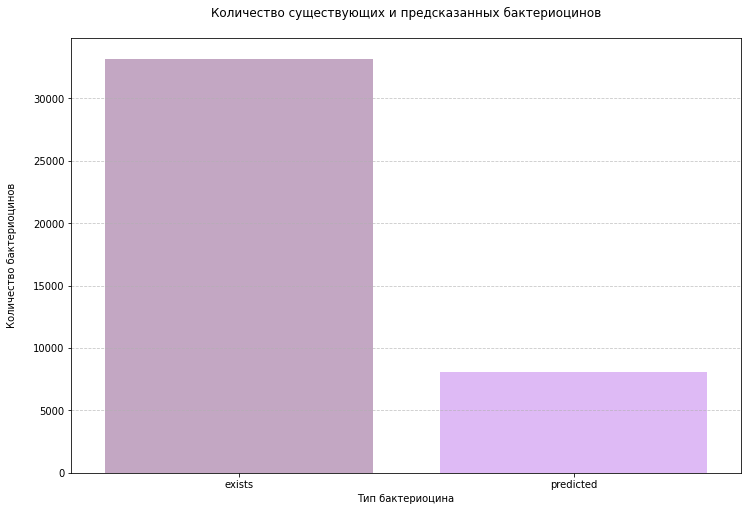

In [86]:
#делаю группировку с агрегацией
countplot_df = real_and_predicted_bacteriocins_df.groupby('Existence', as_index=False) \
    .agg({'Protein_Name': 'count'}) \
    .rename(columns={'Protein_Name': 'Amount'}) \
    .sort_values('Amount', ascending=False)

countplot_df

#создаем кастомную палитру
from matplotlib.colors import LinearSegmentedColormap
colors = ["#f2e6ff", "#d9b3ff", "#bf80ff", "#a64dff"]
custom_palette = LinearSegmentedColormap.from_list("custom_purple", colors)

plt.figure(figsize=(12,8))
sns.barplot(x='Existence', y='Amount', data=countplot_df, palette=['#c8a2c8', '#e0b0ff'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Тип бактериоцина')
plt.ylabel('Количество бактериоцинов\n')

plt.title('Количество существующих и предсказанных бактериоцинов\n');

**6. Данные по геномам бактерий-продуцентов бактериоцинов**

In [54]:
#для доп.поиска данных создаю текстовый файл с уникальными айди бактерий-продуцентов бактериоцинов
TaxID = list(real_and_predicted_bacteriocins_df.TaxID.unique())
TaxID


#записываем каждый ID на новой строке в файл
with open('TaxID_new.txt', 'w') as f:
    for item in TaxID:
        f.write(f"{item}\n")

In [55]:
len(TaxID)

13389

In [58]:
#загрузка данных
result_df = pd.read_csv('result.tsv', sep='\t')
result_df['Category'] = result_df['Category'].replace('na', 'common')
bacteria_annotations = result_df.copy()
bacteria_annotations

,TaxID,Assembly,Category,Organism,FTP_URL,Genome_URL,Annotation_URL
0,7,GCF_036600855.1,common,Azorhizobium caulinodans,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
1,17,GCF_003854875.1,common,Methylophilus methylotrophus,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
2,23,GCF_001735525.1,reference genome,Shewanella colwelliana,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
3,24,GCF_003044255.1,common,Shewanella putrefaciens,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
4,25,GCF_007197645.1,reference genome,Shewanella hanedai,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
...,...,...,...,...,...,...,...
11169,3412328,GCF_049238865.1,common,Enterobacter cloacae complex sp. CDL004,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11170,3412344,GCF_049238365.1,common,Enterobacter cloacae complex sp. IR53030,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11171,3412368,GCF_049238505.1,common,Enterobacter cloacae complex sp. IR5435,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11172,3412403,GCF_049237785.1,common,Enterobacter cloacae complex sp. SHL022,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...


In [59]:
bacteria_annotations.columns

Index(['TaxID', 'Assembly', 'Category', 'Organism', 'FTP_URL', 'Genome_URL',
       'Annotation_URL'],
      dtype='object')

In [60]:
bacteria_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11174 entries, 0 to 11173
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TaxID           11174 non-null  int64 
 1   Assembly        11174 non-null  object
 2   Category        11174 non-null  object
 3   Organism        11174 non-null  object
 4   FTP_URL         11174 non-null  object
 5   Genome_URL      11174 non-null  object
 6   Annotation_URL  11174 non-null  object
dtypes: int64(1), object(6)
memory usage: 611.2+ KB


In [62]:
#меняю местами колонки
bacteria_annotations = bacteria_annotations[['TaxID', 'Organism', 'Assembly', 'Category', 'FTP_URL', 'Genome_URL', 'Annotation_URL']]
bacteria_annotations

,TaxID,Organism,Assembly,Category,FTP_URL,Genome_URL,Annotation_URL
0,7,Azorhizobium caulinodans,GCF_036600855.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
1,17,Methylophilus methylotrophus,GCF_003854875.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
2,23,Shewanella colwelliana,GCF_001735525.1,reference genome,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
3,24,Shewanella putrefaciens,GCF_003044255.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
4,25,Shewanella hanedai,GCF_007197645.1,reference genome,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
...,...,...,...,...,...,...,...
11169,3412328,Enterobacter cloacae complex sp. CDL004,GCF_049238865.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11170,3412344,Enterobacter cloacae complex sp. IR53030,GCF_049238365.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11171,3412368,Enterobacter cloacae complex sp. IR5435,GCF_049238505.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...
11172,3412403,Enterobacter cloacae complex sp. SHL022,GCF_049237785.1,common,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...


In [63]:
#сохраняю датафрейм с данными о бакетриях-продуцентах
bacteria_annotations.to_csv('bacteria_annotations.csv', index=False)

**7. Финальное разбиение данных на таблицы для создания базы данных**

In [65]:
real_and_predicted_bacteriocins_df

,Protein_Name,ID,Protein_Source,Organism,TaxID,Sequence,Existence,Accuracy
0,Lantibiotic mutacin-2,O54329,UniProtKB/TrEMBL,Streptococcus mutans,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1
1,Lantibiotic lacticin 3147 A1,O87236,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1
2,Lantibiotic lacticin 3147 A2,O87237,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1
3,Colicin E3,P00646,UniProtKB/TrEMBL,Escherichia coli,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1
4,Lantibiotic lacticin-481,P36499,UniProtKB/TrEMBL,Lactococcus lactis subsp. lactis,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1
...,...,...,...,...,...,...,...,...
41295,Colicin-DNase,WP_023897753.1,RefSeq,Cronobacter malonaticus,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41296,Colicin-DNase,WP_081050448.1,RefSeq,Cronobacter malonaticus LMG 23826,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41297,Colicin-DNase,WP_128214882.1,RefSeq,Clostridium manihotivorum,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,predicted,0.62
41298,Colicin-DNase,WP_232103089.1,RefSeq,Gimesia maris,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,predicted,0.61


In [66]:
#переименовываю колонки и удаляю лишние
real_and_predicted_bacteriocins_df = real_and_predicted_bacteriocins_df.rename(columns={'TaxID': 'BacteriaTaxID'})
real_and_predicted_bacteriocins_df = real_and_predicted_bacteriocins_df.drop('Organism', axis=1)
real_and_predicted_bacteriocins_df

,Protein_Name,ID,Protein_Source,BacteriaTaxID,Sequence,Existence,Accuracy
0,Lantibiotic mutacin-2,O54329,UniProtKB/TrEMBL,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1
1,Lantibiotic lacticin 3147 A1,O87236,UniProtKB/TrEMBL,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1
2,Lantibiotic lacticin 3147 A2,O87237,UniProtKB/TrEMBL,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1
3,Colicin E3,P00646,UniProtKB/TrEMBL,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1
4,Lantibiotic lacticin-481,P36499,UniProtKB/TrEMBL,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1
...,...,...,...,...,...,...,...
41295,Colicin-DNase,WP_023897753.1,RefSeq,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41296,Colicin-DNase,WP_081050448.1,RefSeq,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41297,Colicin-DNase,WP_128214882.1,RefSeq,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,predicted,0.62
41298,Colicin-DNase,WP_232103089.1,RefSeq,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,predicted,0.61


In [67]:
real_and_predicted_bacteriocins_df.columns

Index(['Protein_Name', 'ID', 'Protein_Source', 'BacteriaTaxID', 'Sequence',
       'Existence', 'Accuracy'],
      dtype='object')

In [68]:
#меняю местами колонки
real_and_predicted_bacteriocins_df = real_and_predicted_bacteriocins_df[['ID', 'Protein_Name', 'Protein_Source', 'BacteriaTaxID', 'Sequence', 'Existence', 'Accuracy']]
real_and_predicted_bacteriocins_df

,ID,Protein_Name,Protein_Source,BacteriaTaxID,Sequence,Existence,Accuracy
0,O54329,Lantibiotic mutacin-2,UniProtKB/TrEMBL,1309,MNKLNSNAVVSLNEVSDSELDTILGGNRWWQGVVPTVSYECRMNSW...,exists,1
1,O87236,Lantibiotic lacticin 3147 A1,UniProtKB/TrEMBL,1360,MNKNEIETQPVTWLEEVSDQNFDEDVFGACSTNTFSLSDYWGNNGA...,exists,1
2,O87237,Lantibiotic lacticin 3147 A2,UniProtKB/TrEMBL,1360,MKEKNMKKNDTIELQLGKYLEDDMIELAEGDESHGGTTPATPAISI...,exists,1
3,P00646,Colicin E3,UniProtKB/TrEMBL,562,MSGGDGRGHNTGAHSTSGNINGGPTGLGVGGGASDGSGWSSENNPW...,exists,1
4,P36499,Lantibiotic lacticin-481,UniProtKB/TrEMBL,1360,MKEQNSFNLLQEVTESELDLILGAKGGSGVIHTISHECNMNSWQFV...,exists,1
...,...,...,...,...,...,...,...
41295,WP_023897753.1,Colicin-DNase,RefSeq,413503,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41296,WP_081050448.1,Colicin-DNase,RefSeq,1159491,MSELLAARIHDPLVHSSLMADVVSGVVEGAICLAALAGGMALMSNP...,predicted,0.68
41297,WP_128214882.1,Colicin-DNase,RefSeq,2320868,MKSFKGFLKNFVIMFLVTVFTAITVSETVLAVESSDLVGLEMELAS...,predicted,0.62
41298,WP_232103089.1,Colicin-DNase,RefSeq,122,MKSKSPPKSPERSQQRPDSDNLHDPLPPRYHVKFCTKLLSGHPLAI...,predicted,0.61


In [69]:
#смотрю, сколько существующих и предсказанных бактериоцинов в итоге в моих данных
real_and_predicted_bacteriocins_df.groupby('Existence').agg({'ID': 'count'})

,ID
Existence,
exists,33195
predicted,8105


In [71]:
#сохраняю датафрейм
real_and_predicted_bacteriocins_df.to_csv('real_and_predicted_bacteriocins_df.csv', index=False)